In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy import stats

In [2]:
cleansed_df = pd.read_csv('final_df.csv')
cleansed_df = cleansed_df.dropna(how='any')
cleansed_df

,YEAR,PLAYER,POSITION,TEAM,SALARY,AGE,GP,W,L,MIN,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,RK
0,2015,Stephen Curry,PG,Golden State Warriors,11370786,28,79,71,8,34.2,...,6.7,3.3,2.1,0.2,2.0,50.3,15,2,12.9,61
1,2015,Shaun Livingston,G,Golden State Warriors,5543725,30,78,69,9,19.5,...,3.0,1.0,0.7,0.3,1.8,15.6,0,0,2.7,132
2,2015,Marreese Speights,F,Golden State Warriors,3815000,28,72,64,8,11.6,...,0.8,0.9,0.3,0.5,1.6,13.7,1,0,0.2,183
3,2015,Leandro Barbosa,G,Golden State Warriors,2500000,33,68,60,8,15.9,...,1.2,0.8,0.6,0.1,1.6,11.8,0,0,0.6,243
4,2015,Klay Thompson,SG,Golden State Warriors,15501000,26,80,71,9,33.3,...,2.1,1.7,0.8,0.6,1.9,32.2,0,0,10.5,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,2019,Nemanja Bjelica,PF,Sacramento Kings,6825000,31,40,15,25,27.3,...,2.5,1.6,0.9,0.6,3.0,26.5,5,0,-1.3,184
322,2019,Richaun Holmes,PF,Sacramento Kings,4767000,26,37,14,23,29.4,...,1.0,1.2,1.1,1.4,3.9,30.9,13,0,0.2,218
323,2019,Trevor Ariza,SF,Sacramento Kings,12195122,34,31,12,19,24.9,...,1.5,0.9,1.1,0.2,2.0,17.1,0,0,-1.5,114
324,2019,Wenyen Gabriel,F,Sacramento Kings,1445697,22,11,2,9,5.6,...,0.3,0.5,0.3,0.2,0.6,4.1,0,0,-2.5,434


In [3]:
cleansed_df['POSITION'].value_counts()

 SG    63
 PF    60
 C     54
 SF    38
 PG    38
 G     37
 F     36
Name: POSITION, dtype: int64

In [4]:
G_stats_df = cleansed_df.loc[cleansed_df['POSITION'] == ' G' ]
SG_stats_df = cleansed_df.loc[cleansed_df['POSITION'] == ' SG' ]
PF_stats_df = cleansed_df.loc[cleansed_df['POSITION'] == ' PF' ]
C_stats_df = cleansed_df.loc[cleansed_df['POSITION'] == ' C' ]
PG_stats_df = cleansed_df.loc[cleansed_df['POSITION'] == ' PG' ]
SF_stats_df = cleansed_df.loc[cleansed_df['POSITION'] == ' SF' ]
F_stats_df = cleansed_df.loc[cleansed_df['POSITION'] == ' F' ]
C_stats_df.head(5)

,YEAR,PLAYER,POSITION,TEAM,SALARY,AGE,GP,W,L,MIN,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,RK
10,2015,Festus Ezeli,C,Golden State Warriors,2008748,26,46,42,4,16.7,...,0.7,0.8,0.4,1.1,2.0,18.3,6,0,4.8,276
13,2015,Andrew Bogut,C,Golden State Warriors,13800000,31,70,62,8,20.7,...,2.3,1.2,0.5,1.6,3.2,22.4,5,0,5.7,40
15,2015,Anderson Varejao,C,Golden State Warriors,289755,33,22,19,3,8.4,...,0.7,0.3,0.2,0.2,1.6,7.5,0,0,-1.3,494
16,2016,Anderson Varejao,C,Golden State Warriors,980431,34,14,12,2,6.6,...,0.7,0.6,0.2,0.2,1.1,5.4,0,0,-2.1,422
19,2016,Damian Jones,C,Golden State Warriors,1171560,22,10,7,3,8.5,...,0.0,0.6,0.1,0.4,1.5,5.6,0,0,-2.8,363


In [5]:
G_cleansed_df_corr = G_stats_df.corr()
corr_G_df = G_cleansed_df_corr.unstack().sort_values()
corr_G_df.to_csv('G_corr.csv', header=True)

SG_cleansed_df_corr = SG_stats_df.corr()
corr_SG_df = SG_cleansed_df_corr.unstack().sort_values()
corr_SG_df.to_csv('SG_corr.csv', header=True)

PF_cleansed_df_corr = PF_stats_df.corr()
corr_PF_df = PF_cleansed_df_corr.unstack().sort_values()
corr_PF_df.to_csv('PF_corr.csv', header=True)

C_cleansed_df_corr = C_stats_df.corr()
corr_C_df = C_cleansed_df_corr.unstack().sort_values()
corr_C_df.to_csv('C_corr.csv', header=True)

PG_cleansed_df_corr = PG_stats_df.corr()
corr_PG_df = PG_cleansed_df_corr.unstack().sort_values()
corr_PG_df.to_csv('PG_corr.csv', header=True)

SF_cleansed_df_corr = SF_stats_df.corr()
corr_SF_df = SF_cleansed_df_corr.unstack().sort_values()
corr_SF_df.to_csv('SF_corr.csv', header=True)

F_cleansed_df_corr = F_stats_df.corr()
corr_F_df = F_cleansed_df_corr.unstack().sort_values()
corr_F_df.to_csv('F_corr.csv', header=True)

In [6]:
corr_G_df = pd.DataFrame(corr_G_df)
corr_G_df

0
SALARY RK     -0.870528
RK     SALARY -0.870528
FGA    RK     -0.455355
RK     FGA    -0.455355
       AGE    -0.434432
...                 ...
PF     PF      1.000000
FP     FP      1.000000
DD2    DD2     1.000000
FTM    FTM     1.000000
RK     RK      1.000000

[900 rows x 1 columns]

In [47]:
def mylinreg(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(8,50000),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}")

The r-squared is: 0.663233164157731


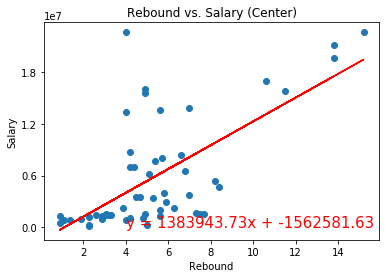

In [38]:
x_REB = C_stats_df['REB']
y_SAL = C_stats_df['SALARY']
plt.scatter(x_REB,y_SAL)
plt.xlabel("Rebound")
plt.ylabel("Salary")
plt.title("Rebound vs. Salary (Center)")
plt.yticks(np.arange(0,40000000,6000000))
mylinreg(x_REB,y_SAL)

The r-squared is: 0.7329870221739592


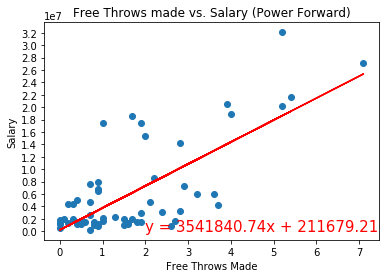

In [41]:
x_FTM = PF_stats_df['FTM']
y_SAL = PF_stats_df['SALARY']
plt.scatter(x_FTM,y_SAL)
plt.xlabel("Free Throws Made")
plt.ylabel("Salary")
plt.title("Free Throws made vs. Salary (Power Forward)")
plt.yticks(np.arange(0,40000000,2000000))
mylinreg(x_FTM,y_SAL)

The r-squared is: 0.6843007448365399


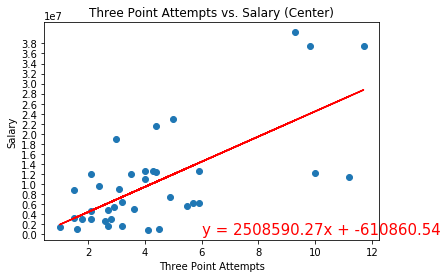

In [10]:
x_3PA = PG_stats_df['3PA']
y_SAL = PG_stats_df['SALARY']
plt.scatter(x_3PA,y_SAL)
plt.xlabel("Three Point Attempts")
plt.ylabel("Salary")
plt.title("Three Point Attempts vs. Salary (Center)")
plt.yticks(np.arange(0,40000000,2000000))
mylinreg(x_3PA,y_SAL)

The r-squared is: 0.861938169690049


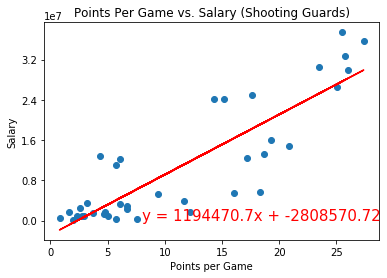

In [50]:
x_PTS = SF_stats_df['PTS']
y_SAL = SF_stats_df['SALARY']
plt.scatter(x_PTS,y_SAL)
plt.xlabel("Points per Game")
plt.ylabel("Salary")
plt.title("Points Per Game vs. Salary (Shooting Guards)")
plt.yticks(np.arange(0,40000000,8000000))
mylinreg(x_PTS,y_SAL)